In [1]:
#导入必要的包
import pandas_datareader.data as webdata
import datetime
import pandas as pd
#datetime用于生成日期数据
start_day = datetime.datetime(2019, 1, 1)
end_day = datetime.datetime(2019, 3, 1)
#通过yahoo财经，查询股票信息
stock_code = input("美股直接输入股票代码如GOOG \n港股输入代码+对应股市，如腾讯：0700.hk \n国内股票需要区分上证和深证，股票代码后面加.ss或者.sz\n请输入你要查询的股票代码：")
stock_info = webdata.get_data_yahoo(stock_code, start_day, end_day)
# 展示前5行
print(stock_info.head())

美股直接输入股票代码如GOOG 
港股输入代码+对应股市，如腾讯：0700.hk 
国内股票需要区分上证和深证，股票代码后面加.ss或者.sz
请输入你要查询的股票代码：0700.hk
                  High         Low        Open       Close    Volume  \
Date                                                                   
2019-01-02  315.000000  306.200012  315.000000  306.600006  15721297   
2019-01-03  309.399994  302.799988  304.000000  305.000000  16420034   
2019-01-04  311.000000  300.399994  300.399994  310.600006  19329055   
2019-01-07  318.799988  313.600006  318.000000  317.600006  24890962   
2019-01-08  318.600006  312.000000  318.000000  315.600006  16264928   

             Adj Close  
Date                    
2019-01-02  304.909271  
2019-01-03  303.318085  
2019-01-04  308.887207  
2019-01-07  315.848633  
2019-01-08  313.859650  


前5行数据：
   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  

乘客按照性别统计的生还者和遇难者：
0：遇难；1：生还
survived    0    1  sum       生还率
sex                              
female     81  233  314  0.742038
male      468  109  577  0.188908

生还者船票价格统计描述：
count    342.000000
mean      48.

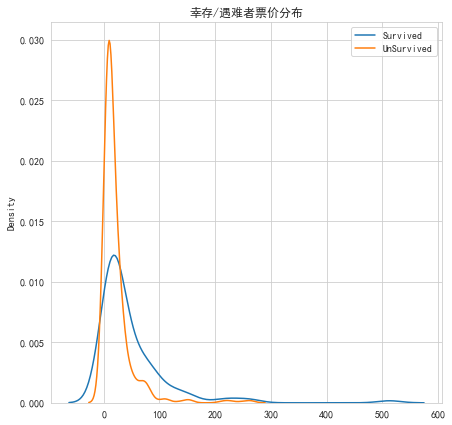

In [27]:
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

#处理NoteBook内嵌图形问题
%matplotlib inline 
#处理Seaborn图表内嵌中文字体问题
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False 
sns.set_style('whitegrid',{'font.sans-serif':['simhei','Arial']})

#载入泰坦尼克数据库，显示乘客信息的头5行
PasTit = sns.load_dataset('titanic')
print('前5行数据：')
print(PasTit.head())

#统计幸存者的性别比例
survived=PasTit.groupby(['sex','survived']).size().unstack()
survived['sum']=survived[0]+survived[1]
survived['生还率']=survived[1]/survived['sum']
print()
print('乘客按照性别统计的生还者和遇难者：')
print('0：遇难；1：生还')
print(survived)

fare_surv=PasTit.loc[PasTit['survived']==1,'fare']
fare_unsurv=PasTit.loc[PasTit['survived']==0,'fare']
print()
print('生还者船票价格统计描述：')
print(fare_surv.describe())
print('遇难者船票价格统计描述：')
print(fare_unsurv.describe())

f, ax = plt.subplots(figsize=(7,7))
sns.kdeplot(np.array(fare_surv),label='Survived')
sns.kdeplot(np.array(fare_unsurv),label='UnSurvived')
plt.legend()
ax.set(title='幸存/遇难者票价分布')

plt.savefig('ch05_seaGet',dpi=300,bbox_inches='tight')

In [3]:
#引入正则表达式模块
import re  
#引入操作url的模块
import urllib.request  
  
target = 'http://www.bing.com'
#自动读取页面
content = urllib.request.urlopen(target).read()  
#指定文本解码方式
content = content.decode('utf-8')   
#使用正则表达式匹配读取到的页面内容，将超链接放入link_list中
link_list = re.findall(r"((https?|ftp|file)://[-A-Za-z0-9+&@#/%?=~_|!:,.;]+[-A-Za-z0-9+&@#/%=~_|])", content)  
for url in link_list:
    print(url)

('https://login.microsoftonline.com', 'https')
('https://outlook.com/?WT.mc_id=O16_BingHP', 'https')
('https://business.bing.com/api/v3/search/person/photo?id=', 'https')
('https://www.office.com?WT.mc_id=O16_BingHP', 'https')
('https://office.live.com/start/Word.aspx?WT.mc_id=O16_BingHP', 'https')
('https://office.live.com/start/Excel.aspx?WT.mc_id=O16_BingHP', 'https')
('https://office.live.com/start/PowerPoint.aspx?WT.mc_id=O16_BingHP', 'https')
('https://www.onenote.com/notebooks?WT.mc_id=O16_BingHP', 'https')
('https://sway.office.com?WT.mc_id=O16_BingHP&amp;utm_source=O16Bing&amp;utm_medium=Nav&amp;utm_campaign=HP', 'https')
('https://onedrive.live.com/?gologin=1&amp;WT.mc_id=O16_BingHP', 'https')
('https://calendar.live.com/?WT.mc_id=O16_BingHP', 'https')
('https://outlook.live.com/owa/?path=/people&amp;WT.mc_id=O16_BingHP', 'https')
('https://outlook.com/?WT.mc_id=O16_BingHP?mkt=zh-CN', 'https')
('https://beian.miit.gov.cn', 'https')
('http://www.beian.gov.cn/portal/registerSys

In [4]:
#正则表达式包re
import re
phone = "0086-20-37215850 # 这是一个带国际长途区号的电话号码" 
# 删除字符串中的 Python注释 
num = re.sub(r'#.*$', "", phone)
print('电话号码是: ', num)

电话号码是:  0086-20-37215850 


In [5]:
# 删除非数字(-)的字符串 
num = re.sub(r'\D', '', phone)
print('电话号码是 : ', num)

电话号码是 :  00862037215850


In [6]:
import numpy as np
f=open('./Exp04_file01.txt','r')
#按行读取，并显示
for eachline in f.readlines():    
#原txt文件每行以换行符结束，使用strip去掉换行符
#使得输出紧凑。不去掉则每两行数据间会有一个空行
    eachline=eachline.strip('\n')
    print(eachline)
f.close()

序号 X坐标 Y坐标
1 1.658985 4.285136  
2 -3.453687 3.424321  
3 4.838138 -1.151539  
4 -5.379713 -3.362104  
5 0.972564 2.924086  


In [7]:
arrA=[]
#NumPy可以直接使用loadtxt读取文本文件到数组
#skiprows表示忽略首行，usecols表示只取第1，2列数据（从0列开始），请参考 
#https://penandpants.com/2012/03/09/reading-text-tables-with-python/ 
arrA=np.loadtxt('./Exp04_file01.txt',skiprows=1,usecols=(1,2))
print('读入arrA：')
print(arrA)

读入arrA：
[[ 1.658985  4.285136]
 [-3.453687  3.424321]
 [ 4.838138 -1.151539]
 [-5.379713 -3.362104]
 [ 0.972564  2.924086]]


In [8]:
#求arrA第一列和第二列的平均值
#mean中的axis参数为0表示按列求均值，1表示按行
Ave=arrA.mean(axis=0)
print('按列求平均值：')
print(Ave)

按列求平均值：
[-0.2727426  1.22398  ]


In [9]:
#将Ave与arrA拼接
NewArr=np.vstack((arrA,Ave))
print('最后一行加入平均值的新矩阵NewArr：')
print(NewArr)

最后一行加入平均值的新矩阵NewArr：
[[ 1.658985   4.285136 ]
 [-3.453687   3.424321 ]
 [ 4.838138  -1.151539 ]
 [-5.379713  -3.362104 ]
 [ 0.972564   2.924086 ]
 [-0.2727426  1.22398  ]]


In [10]:
#将NewArr保存到新文件。
#行内两个数值用逗号分隔，加入表头和表尾
#请注意，输出文件的换行符为Unix格式，与Windows下换行符有区别
#在Windows下直接使用Notepad打开无换行，建议使用Notepad++打开输出文件
print('输出NewArr到文件Exp04_file01_out.txt')
print('为了正确显示输出文件的换行效果，建议使用Notepad++查看')
np.savetxt('./Exp04_file01_out.txt',NewArr, 
           fmt='%f,%f',delimiter=',',newline=' \n',
           header='Xaxis Yaxis',footer='Made in GDUF')

输出NewArr到文件Exp04_file01_out.txt
为了正确显示输出文件的换行效果，建议使用Notepad++查看


In [11]:
#导入pypyodbc模块
import pypyodbc
# 数据库连接控制字
str = 'Driver={Microsoft Access Driver (*.mdb,*.accdb)};DBQ=.\Exp04.mdb'
#打开数据库
db=pypyodbc.win_connect_mdb(str)                
# 产生cursor游标
curser = db.cursor()                                    
#从表t1中选择记录
curser.execute("select * from t1")
# 显示行描述
for col in curser.description:                        
    print (col[0], col[1])

id <class 'int'>
empno <class 'str'>
empname <class 'str'>
basicsalary <class 'int'>


In [12]:
# 读取所有记录
result = curser.fetchall()
# 输出各字段的值
for row in result:                                      
    print (row)
# 输出某一字段的值    
for row in result:    
    print (row[2])

(83, '1234', 'tom', 2500)
(84, '2345', 'jerry', 2800)
(85, '1101', 'Pluto', 5000)
tom
jerry
Pluto


In [13]:
import pypyodbc

#定义数据库连接函数
def mdb_conn(db_name, password = ""):
    str = 'Driver={Microsoft Access Driver (*.mdb)};PWD' + password + ";DBQ=" + db_name
    conn = pypyodbc.win_connect_mdb(str)
    return conn

#输出所有记录
def mdb_show(conn, cur, tablename):
    try:
        sql = "SELECT * FROM " + tablename
        cur.execute(sql)
        result = cur.fetchall()
        for row in result:                                      
            print (row[1],row[2],row[3])
        return True
    except:
        return False

#数据库添加记录
def mdb_add(conn, cur, sql):
    try:
        cur.execute(sql)
        conn.commit()
        return True
    except:
        return False

#删除记录
def mdb_del(conn, cur, sql):
    try:
        cur.execute(sql)
        conn.commit()
        return True
    except:
        return False

#修改记录
def mdb_modi(conn, cur, sql):
    try:
        cur.execute(sql)
        conn.commit()
        return True
    except:
        return False

#查询记录
def mdb_sel(cur, sql):
    try:
        cur.execute(sql)
        return cur.fetchall()
    except:
        return []

#数据库改回初始状态
def rec_mdb(conn,cur, table):
    sqlclean = "Delete * FROM " + tablename
    sqlrecovery1 = "Insert Into [" + tablename +"] (empno, empname,basicsalary )" + " Values ('1234', 'tom', 2500)"
    sqlrecovery2 = "Insert Into [" + tablename +"] (empno, empname,basicsalary )" + " Values ('2345', 'jerry', 2800)"
    sqlrecovery3 = "Insert Into [" + tablename +"] (empno, empname,basicsalary )" + " Values ('1101', 'Pluto', 5000)"
    try:
        cur.execute(sqlclean)
        conn.commit()
        cur.execute(sqlrecovery1 )
        conn.commit()
        cur.execute(sqlrecovery2 )
        conn.commit()
        cur.execute(sqlrecovery3 )
        conn.commit()
        return True
    except:
        return False

if __name__ == '__main__':
    datafile = '.\Exp04.mdb'
    tablename = 't1'
    conn = mdb_conn(datafile)
    cur = conn.cursor()
    print('显示当前所有记录：')
    mdb_show(conn, cur, 't1')
#查
    sql = "SELECT * FROM " + tablename + " where BasicSalary > 2600"
    sel_data = mdb_sel(cur, sql)
    print('基本工资 > 2600查询结果：')
    for selset in sel_data:
        print(selset[1],selset[2],selset[3])
#增
    sql = "Insert Into [" + tablename +"] (empno, empname,basicsalary )" + " Values ('3421','gduf',3400)"
    if mdb_add(conn, cur, sql):
       print("插入成功！添加记录：3421，gduf，3400。添加后：")
       mdb_show(conn, cur, 't1')
    else:
       print("插入失败！")
#删
    sql = "Delete * FROM " + tablename + " where EmpNo = '1234'"
    if mdb_del(conn, cur, sql):
       print("删除成功！删除EmpNo=1234的记录。删除后：")
       mdb_show(conn, cur, 't1')
    else:
       print("删除失败！")
#改
    sql = "Update " + tablename + " Set basicsalary = 3600 where empno = '1101'"
    if mdb_modi(conn, cur, sql):
       print("修改成功！将EmpNo = '1101'的BasicSalary改为3600。修改后：")
       mdb_show(conn, cur, 't1')
    else:
       print("修改失败！")

    rec_mdb(conn, cur,'t1' )
    print("恢复数据库,供重复使用本案例：")
    mdb_show(conn, cur, 't1')
    
    cur.close()    #关闭游标
    conn.close()   #关闭数据库连接

显示当前所有记录：
1234 tom 2500
2345 jerry 2800
1101 Pluto 5000
基本工资 > 2600查询结果：
2345 jerry 2800
1101 Pluto 5000
插入成功！添加记录：3421，gduf，3400。添加后：
1234 tom 2500
2345 jerry 2800
1101 Pluto 5000
3421 gduf 3400
删除成功！删除EmpNo=1234的记录。删除后：
2345 jerry 2800
1101 Pluto 5000
3421 gduf 3400
修改成功！将EmpNo = '1101'的BasicSalary改为3600。修改后：
2345 jerry 2800
1101 Pluto 3600
3421 gduf 3400
恢复数据库,供重复使用本案例：
1234 tom 2500
2345 jerry 2800
1101 Pluto 5000


中国信息：
   iso3c iso2c   name               region  \
48   CHN    CN  China  East Asia & Pacific   

                                    adminregion          incomeLevel  \
48  East Asia & Pacific (excluding high income)  Upper middle income   

   lendingType capitalCity  longitude  latitude  
48        IBRD     Beijing    116.286   40.0495  
                  NY.GDP.PCAP.KD
country     year                
China       2018     7807.057809
            2017     7346.836564
            2016     6908.109134
            2015     6500.418323
            2014     6103.748402
            2013     5710.669905
            2012     5325.358417
            2011     4961.230447
            2010     4550.453108
Korea, Rep. 2018    28157.734447
            2017    27492.576255
            2016    26725.501716
            2015    26063.706487
            2014    25485.584007
            2013    24850.354399
            2012    24197.941370
            2011    23754.772455
            2010    23087.225

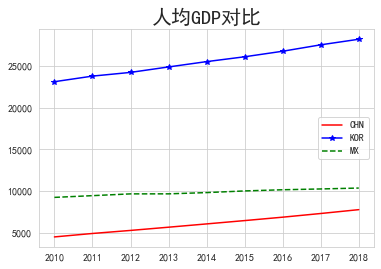

In [14]:
#导入wb用于查询世界银行数据
#http://ju.outofmemory.cn/entry/308589
#https://pandas-datareader.readthedocs.io/en/latest/readers/world-bank.html?highlight=
#pandas_datareader.wb
import pandas_datareader.wb as worldbank
import matplotlib.pyplot as plt
import pandas as pd

plt.rcParams['font.sans-serif']=['SimHei']

start_year = 2010
end_year = 2018

#查询数据库中所有国家信息
countries=worldbank.get_countries()
#查询中国的国家信息
print("中国信息：")
print(countries[countries["name"]=="China"])

#读取KOR，MX和CHN的人均GDP数据（按照当前美元计价），
#数据库中其标志为NY.GDP.PCAP.KD

dat = worldbank.download(indicator="NY.GDP.PCAP.KD", country=["KOR", "MX","CHN"], start=start_year, end=end_year)
print(dat)
dat2draw=dat.unstack(level=0)
#dat2draw.plot()
plt.plot(dat2draw.iloc[:,0],'r-',label="CHN")
plt.plot(dat2draw.iloc[:,1],'b-*',label="KOR")
plt.plot(dat2draw.iloc[:,2],'g--',label="MX")
plt.title("人均GDP对比",fontsize=20)
plt.legend()
plt.savefig('世行GDP.png',dpi=300, bbox_inches="tight")
plt.show()

美股直接输入股票代码如GOOG 
港股输入代码+对应股市，如腾讯：0700.hk 
国内股票需要区分上证和深证，股票代码后面加.ss或者.sz
请输入你要查询的股票代码：600519.ss
                   High          Low         Open        Close   Volume  \
Date                                                                      
2021-01-04  2004.989990  1983.810059  1990.099976  1997.000000  4351400   
2021-01-05  2059.449951  1982.459961  1990.000000  2059.449951  5211605   
2021-01-06  2125.000000  2036.030029  2064.800049  2100.000000  4741020   
2021-01-07  2140.000000  2075.000000  2097.000000  2140.000000  3793139   
2021-01-08  2150.879883  2063.020020  2140.000000  2090.000000  5386164   

              Adj Close  
Date                     
2021-01-04  1997.000000  
2021-01-05  2059.449951  
2021-01-06  2100.000000  
2021-01-07  2140.000000  
2021-01-08  2090.000000  


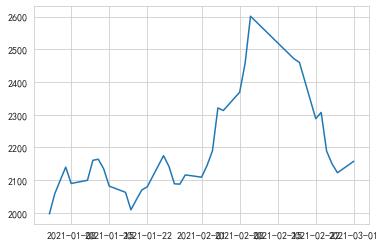

In [28]:
'''
复习思考题1:使用Pandas_datareader获取任意两支股票近三个月的交易数据。做出收盘价的变动图像。
'''
import pandas_datareader.data as webdata
import datetime
import pandas as pd
from matplotlib import pyplot as plt
#datetime用于生成日期数据
start_day = datetime.datetime(2021, 1, 1)
end_day = datetime.datetime(2021, 3, 1)
#通过yahoo财经，查询股票信息
stock_code = input("美股直接输入股票代码如GOOG \n港股输入代码+对应股市，如腾讯：0700.hk \n国内股票需要区分上证和深证，股票代码后面加.ss或者.sz\n请输入你要查询的股票代码：")
stock_info = webdata.get_data_yahoo(stock_code, start_day, end_day)
# 展示前5行
print(stock_info.head())

plt.plot(stock_info['Close'])

                    NY.GDP.PCAP.KD
country       year                
Switzerland   2020             NaN
              2019    79406.657667
              2018    79234.963020
              2017    77684.048208
              2016    77026.335609
...                            ...
United States 2004    47287.593770
              2003    45980.514585
              2002    45087.367276
              2001    44728.597476
              2000    44726.965396

[63 rows x 1 columns]


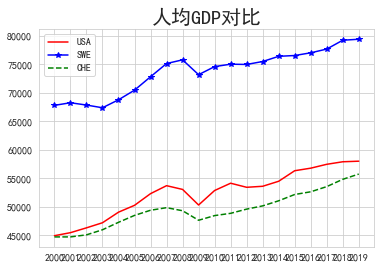

In [21]:
'''
复习思考题2:使用Pandas_datareader获取世界银行数据库中美国（USA）、瑞典（SWE）、瑞士（CHE）三个国家近20年的NY.GDP.PCAP.KD数据，作图分析。
'''
import pandas_datareader.wb as worldbank
import matplotlib.pyplot as plt
import pandas as pd

plt.rcParams['font.sans-serif']=['SimHei']

start_year = 2000
end_year = 2020

#读取USA，SWE和CHE的人均GDP数据（按照当前美元计价），
#数据库中其标志为NY.GDP.PCAP.KD

dat = worldbank.download(indicator="NY.GDP.PCAP.KD", country=["USA","SWE","CHE"], start=start_year, end=end_year)
print(dat)
dat2draw=dat.unstack(level=0)
#dat2draw.plot()
plt.plot(dat2draw.iloc[:,0],'r-',label="USA")
plt.plot(dat2draw.iloc[:,1],'b-*',label="SWE")
plt.plot(dat2draw.iloc[:,2],'g--',label="CHE")
plt.title("人均GDP对比",fontsize=20)
plt.legend()
plt.savefig('世行GDP.png',dpi=300, bbox_inches="tight")
plt.show()

前5行数据：
   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  

乘客按照是否独立登船统计的生还者和遇难者：
0：遇难；1：生还
survived    0    1  sum       生还率
alone                            
False     175  179  354  0.505650
True      374  163  537  0.303538

生还者年龄价格统计描述：
count    290.000000
mean     

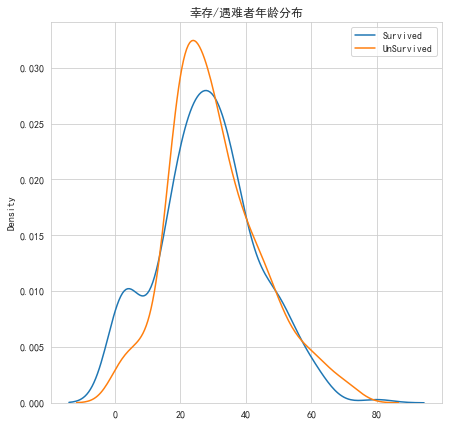

In [29]:
'''
复习思考题3:对于泰坦尼克的数据集，试分析幸存与否与独立登船相关（alone数据列），进一步地，可以分析与年龄段（age数据列）是否相关。
'''
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

#处理NoteBook内嵌图形问题

#处理Seaborn图表内嵌中文字体问题
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False 
sns.set_style('whitegrid',{'font.sans-serif':['simhei','Arial']})

#载入泰坦尼克数据库，显示乘客信息的头5行
PasTit = sns.load_dataset('titanic')
print('前5行数据：')
print(PasTit.head())

#统计幸存者的性别比例
survived=PasTit.groupby(['alone','survived']).size().unstack()
survived['sum']=survived[0]+survived[1]
survived['生还率']=survived[1]/survived['sum']
print()
print('乘客按照是否独立登船统计的生还者和遇难者：')
print('0：遇难；1：生还')
print(survived)

age_surv=PasTit.loc[PasTit['survived']==1,'age']
age_unsurv=PasTit.loc[PasTit['survived']==0,'age']
print()
print('生还者年龄价格统计描述：')
print(age_surv.describe())
print('遇难者年龄价格统计描述：')
print(age_unsurv.describe())

f, ax = plt.subplots(figsize=(7,7))
sns.kdeplot(np.array(age_surv),label='Survived')
sns.kdeplot(np.array(age_unsurv),label='UnSurvived')
plt.legend()
ax.set(title='幸存/遇难者年龄分布')

plt.savefig('ch05_seaGet1',dpi=300,bbox_inches='tight')